Job 0 -------------------------------------------------------

In [1]:
# creates an 'output.txt' file in the local directory
with open('output.txt','w',encoding='utf-8') as file_io :
    file_io.write(input('Enter a string of characters: '))

Enter a string of characters: 


Job 0.1 ------------------------------------------------------------------

In [2]:
# prints the content of 'output.txt' located in the local directory
# on the standard outputfile in the current directory
with open('output.txt','r',encoding='utf-8') as file_io :
    print(file_io.read())

Job 01 --------------------------------------------------------------------

In [3]:
import re
# open 'domains.xml' file from current directory and
# returns the count of extension domains
with open('domains.xml', 'r') as domains_io :
    data = domains_io.read()
    extensions = re.findall(r'\.[a-z]{2,3}[^a-z]', data)    
print('Total number of domain extensions is:', len(extensions))

extensions = [extension[1:-1] for extension in extensions]
counts = {}
for extension in set(extensions):
    counts[extension] = extensions.count(extension)
print(*sorted(counts.items()))

Total number of domain extensions is: 297
('at', 3) ('biz', 3) ('by', 1) ('cc', 1) ('co', 5) ('com', 175) ('de', 17) ('eu', 5) ('fr', 9) ('ht', 1) ('in', 3) ('it', 2) ('la', 1) ('lv', 1) ('me', 3) ('net', 39) ('nu', 1) ('org', 15) ('ru', 2) ('tk', 1) ('us', 4) ('web', 1) ('ws', 1) ('xl', 1) ('ze', 1) ('zik', 1)


Job 01 bis ---------------------------------------------------------------

In [4]:
# count the number of words without special characters in 'data.txt'
with open('data.txt', 'r') as data_io :
    txt = data_io.read()
words = re.findall('[a-zA-Z]+',txt)
word_count = len(words) 
print('Number of words without special characters:', word_count)
print(*words[:10],'...')

Number of words without special characters: 1176509
Lorem ipsum dolor sit amet consectetur adipiscing elit De quibus ...


Job 02 -------------------------------------------------------------------

In [6]:
# count words of the specified length
length = int(input('Enter an integer: '))
words_len_n = re.findall(f'[a-zA-Z]{{{length}}}', txt)
word_len_n_count = len(words_len_n)
print(f'Number of words of length {length}:', word_len_n_count)
print(*words_len_n[:10],'...')

Enter an integer: 5
Number of words of length 5: 782690
Lorem ipsum dolor conse ctetu adipi scing quibu cupio scire ...


Job 03 --------------------------------------------------------------------

In [7]:
import matplotlib.pyplot as plt

In [8]:
# scan 'data.txt' and count each letters
counts = dict.fromkeys('abcdefghijklmnopqrstuvwxyz', 0)

for letter in counts :
    counts[letter] = len(re.findall(letter, txt.lower()))

number_of_letters = sum(counts.values())
letter_frequencies = {}

for letter in counts :
    letter_frequencies[letter] = counts[letter] / number_of_letters

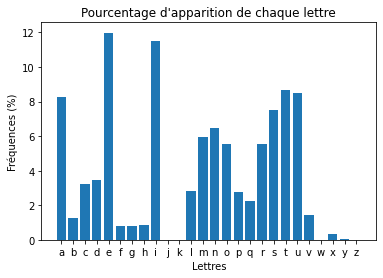

In [9]:
plt.bar(letter_frequencies.keys(), [100*x for x in letter_frequencies.values()])
plt.xlabel('Lettres')
plt.ylabel('Fréquences (%)')
plt.title('Pourcentage d\'apparition de chaque lettre');

Job 05 ------------------------------------------------------------------

In [10]:
# scan words without special characters by sizes in 'data.txt'
size_counts = {}
words = re.findall('[a-zA-Z]+', txt)
for word in words :
    size_counts[len(word)] = size_counts.get(len(word), 0) + 1
    
number_of_words = sum(size_counts.values())
size_frequencies = {}
for size in size_counts :
    size_frequencies[size] = size_counts[size] / number_of_words

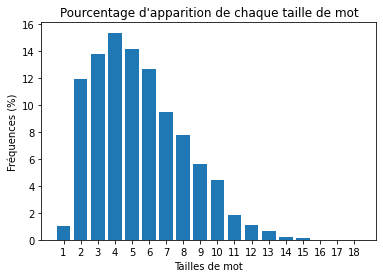

In [11]:
plt.bar(size_frequencies.keys(), [100*x for x in size_frequencies.values()])
plt.xlabel('Tailles de mot')
plt.ylabel('Fréquences (%)')
plt.title('Pourcentage d\'apparition de chaque taille de mot')
plt.xticks(range(1, max(size_counts) + 1));

Job 08 -------------------------------------------------------------------

In [15]:
# scan first letter of words without special characters in 'data.txt'
first_letter_counts = dict.fromkeys('abcdefghijklmnopqrstuvwxyz', 0)
first_letters = re.findall('(?<![a-z])[a-z]', txt.lower())
for letter in first_letters :
    first_letter_counts[letter] += 1
number_of_words = sum(first_letter_counts.values())
first_letter_frequencies = {}
for count in first_letter_counts :
    first_letter_frequencies[count] = first_letter_counts[count] / number_of_words

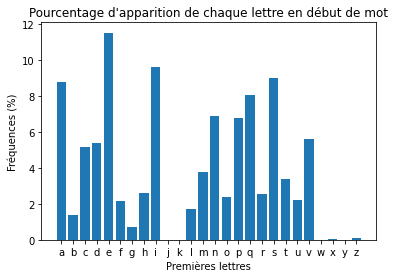

In [16]:
plt.bar(first_letter_frequencies.keys(), [100*x for x in first_letter_frequencies.values()])
plt.xlabel('Premières lettres')
plt.ylabel('Fréquences (%)')
plt.title('Pourcentage d\'apparition de chaque lettre en début de mot');

Job 13 --------------------------------------------------------------------

In [17]:
# scan next letter frequency in 'data.txt'
letters = dict.fromkeys('abcdefghijklmnopqrstuvwxyz')
for letter in letters:
    letters[letter] = dict.fromkeys('abcdefghijklmnopqrstuvwxyz',0)
with open('data.txt', 'r') as data_io :
    txt = data_io.read().lower()
    for letter1, letter2 in zip(txt[:-1], txt[1:]) :
        if letter1 in letters and letter2 in letters :
            letters[letter1][letter2] += 1

next_frequencies = dict.fromkeys('abcdefghijklmnopqrstuvwxyz')
for letter in next_frequencies:
    next_frequencies[letter] = dict.fromkeys('abcdefghijklmnopqrstuvwxyz',0)
    
for letter1 in letters :
    total_counts = sum(letters[letter1].values())
    if total_counts:
        for letter2 in letters :
            next_frequencies[letter1][letter2] = letters[letter1][letter2] / total_counts

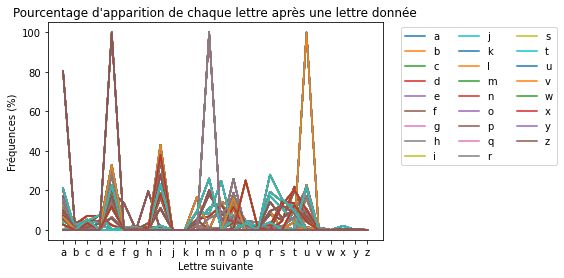

In [18]:
for letter1 in letters :
    for letter2 in letters :
        plt.plot(next_frequencies[letter1].keys(), [100*x for x in next_frequencies[letter1].values()])
plt.xlabel('Lettre suivante')
plt.ylabel('Fréquences (%)')
plt.title('Pourcentage d\'apparition de chaque lettre après une lettre donnée')
plt.legend(letters.keys(), bbox_to_anchor=(1.04, 1), loc="upper left", ncol=3);

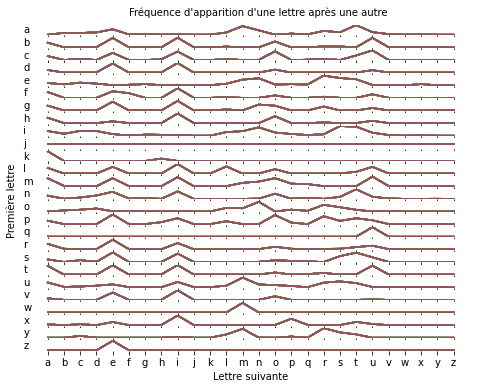

In [19]:
fig, axs = plt.subplots(26, sharex=True, figsize = (8,6))
for i,letter1 in enumerate(letters) :
    for letter2 in letters :
        axs[i].spines['top'].set_visible(False)
        axs[i].spines['right'].set_visible(False)
        axs[i].spines['bottom'].set_visible(False)
        axs[i].spines['left'].set_visible(False)
        axs[i].get_yaxis().set_ticks([])
        axs[i].plot(next_frequencies[letter1].keys(), [100*x for x in next_frequencies[letter1].values()])
        axs[i].set(yticklabels=[])
        axs[i].set_ylabel(letter1, rotation=0, loc='bottom')
plt.xlabel('Lettre suivante')
plt.text(-2.5,1200,'Première lettre', rotation=90)
plt.text(5,3500,'Fréquence d\'apparition d\'une lettre après une autre');

Job 21 -------------------------------------------------------------

In [21]:
import numpy as np

In [22]:
def pseudo_word_gen():
    # Word generator
    word = ''
    # Pick word size
    w_size = np.random.choice(list(size_frequencies.keys()), p=list(size_frequencies.values()))
    # Pick first letter
    word += np.random.choice(list(first_letter_frequencies.keys()), p=list(first_letter_frequencies.values()))
    # Pick the remaining letters
    for i in range(w_size-1) :
        word += np.random.choice(list('abcdefghijklmnopqrstuvwxyz'), p=list(next_frequencies[word[i]].values()))
    
    return word

In [57]:
for _ in range(10) :
    print(pseudo_word_gen())

ecorita
vear
ilimer
monni
ecem
teamell
na
seovianc
tuamo
adipra


Job 34 --------------------------------------------------------------------

In [28]:
# count the number of words without special characters per sentence
w_per_phrase_counts = []
with open('data.txt', 'r') as data_io :
    suite = 0
    for word in data_io.read().split():
        if '.' in word :
            w_per_phrase_counts.append(suite + 1)
            suite = 0
        else :
            suite += 1

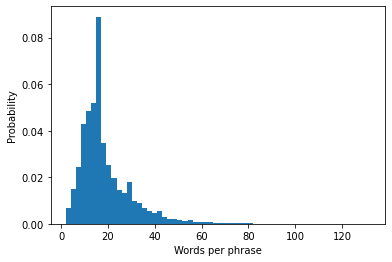

In [29]:
plt.hist(w_per_phrase_counts, bins = 60, density=True)
plt.xlabel('Words per phrase')
plt.ylabel('Probability');

In [30]:
# count the number of words without special characters per sentence
w_per_phrase_counts = {}
with open('data.txt', 'r') as data_io :
    suite = 0
    for word in data_io.read().lower().split():
        if '.' in word :
            w_per_phrase_counts[suite + 1] = w_per_phrase_counts.get(suite + 1, 0) + 1
            suite = 0
        else :
            suite += 1
w_per_phrase_frequencies = {}
number_of_phrases = sum(w_per_phrase_counts.values())
for num_of_w in w_per_phrase_counts :
    w_per_phrase_frequencies[num_of_w] = w_per_phrase_counts[num_of_w] / number_of_phrases 

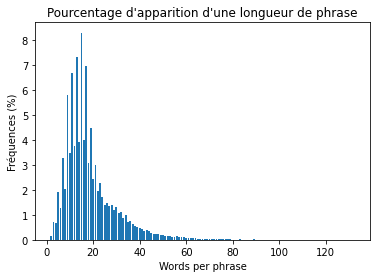

In [31]:
plt.bar(w_per_phrase_frequencies.keys(), [100*x for x in w_per_phrase_frequencies.values()])
plt.xlabel('Words per phrase')
plt.ylabel('Fréquences (%)')
plt.title('Pourcentage d\'apparition d\'une longueur de phrase');

In [32]:
def pseudo_phrase_gen():
    phrase_len = np.random.choice(list(w_per_phrase_frequencies.keys()),p = list(w_per_phrase_frequencies.values()))
    phrase = pseudo_word_gen().capitalize()
    for _ in range(phrase_len-1) :
        phrase += ' ' + pseudo_word_gen()
    phrase += '.'
    return phrase

In [33]:
for _ in range(10) :
    print(pseudo_phrase_gen())

Quare amata ptediar iveipuo nqudih visunt cud at dete qumon qu mnamater din.
Etentumsinte af se isitiv ta qubu starret atiu dastaticaet fat pr que aman elitaneli llel.
Or qusis quiac enguteae itin er cumenvon iatituie iidinea lad qusere regrat egumnser pitin cciden cercia hideaux ca imu hiletua nortiuta tidause seront pral aumoc isibateti sicui ques pep ineri ional a mp cum ipensste eres q pophit dor ci ticoniq.
Artu qummih inipes qu vosstu equdi prami cidinofi plerier qu ssimul vemo ptert ioll.
Nuinti sort quidont qusu morinanib vaxauietie rat indo miui ensio quu adi tenoseatas amitqum desp simusiolid ematap.
Quitiminin v fuinonamqu tesem st ce is ihamu velcta simm viuesnole entetum ntui est eribu mneram pplu nusenodav isua iofintu ere qus qusisepa assotie.
Aussto blteblli eamineribi len ea hihae eturtum ptequritale nte iduitae purtupuidierea ngereo pi bumolici piumu cumueffelod ssseme si minal.
Ne pig cu terer eramnt buiqu reli amit ve quctia seri umofitest dotui im nepertstes qum fr

Job 55 -------------------------------------------------------------------

In [55]:
with open('data.txt', 'r', encoding='utf-8') as data_io :
    txt = data_io.read()
words = re.findall('(?i)[a-z]+',txt)
unique_words = []
for word in set(words) :
    if txt.count(word) == 1 :
        unique_words.append(word)
print(unique)
# the hidden pokemon was 'Psyduck'

['persequitur', 'adipiscing', 'Lorem', 'interrete', 'Marius', 'levaret', 'despicere', 'sedulitatem', 'inaniter', 'adsumitur', 'adprobato', 'consectetur', 'psyduck', 'Reges', 'exquiritur', 'mentitum', 'appetatur', 'carmine', 'notae', 'altiorem', 'percipiatur', 'constructio', 'Oedipodis', 'Phaedrum', 'maximo', 'expulsus', 'qualibus', 'requirentis', 'palato', 'mollissimo', 'argumento', 'demersus', 'palude', 'venientis', 'constat', 'adsensu', 'talia', 'tropaeorum', 'audirem']


In [34]:
# requires 'pokemon.csv' in local directory
with open('pokemon.csv', 'r', encoding='utf-8') as data_io :
    names = []
    for line in data_io :
        names.append( line.split(',')[1].lower() ) # names are in 2nd column

with open('data.txt', 'r', encoding='utf-8') as data_io :
    for word in data_io.read().lower().split() :
        if word in names : break

print('Le Pokémon caché est:', word.capitalize())
# The hidden pokemon was 'Psyduck'

Le Pokémon caché est: Psyduck


In [63]:
# requires 'pokemon.csv' in local directory
with open('pokemon.csv', 'r', encoding='utf-8') as data_io :
    names = []
    for line in data_io :
        names.append( line.split(',')[1].lower() ) # names are in 2nd column

with open('data.txt', 'r', encoding='utf-8') as data_io :
    txt = data_io.read().lower()
    words = re.findall('(?i)[a-z]+',txt)

print('Le Pokémon caché est:', *set(words) & set(names))
# The hidden pokemon was 'Psyduck'

Le Pokémon caché est: psyduck
